# HRP Portfolios

In [ ]:
%load_ext autoreload
%autoreload 2  

import numpy as np
import pandas as pd
import yfinance as yf
import functions as f
import matplotlib.pyplot as plt
import datetime as dt
import funcoes as f
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [ ]:
stock_prices = pd.read_csv('precos.csv', sep=';', index_col='Date')
# stock_prices = pd.read_csv('precos.csv', sep=';', index_col='Date').iloc[ : , :16].drop('BOVA11.SA', axis='columns')
benchmark = stock_prices['BOVA11.SA']
stock_prices.drop('BOVA11.SA', axis=1, inplace=True)

In [ ]:
def weight_hrp(df):
    n = len(r.columns)
    ew = pd.Series(1/n, index=r.columns)
    return ew

Benchmark Done
EW Done
Eigen Done
PCA Done


,Annualized Return,Annualized Vol,Sharpe Ratio,Sortino Ratio,Average Drawdown,Max Drawdown,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%)
BOVA11,6.67,23.13,0.28847,0.54046,-9.48,-37.65,-0.74857,6.27378,11.07,14.51
EW,14.29,22.85,0.62530,0.97542,-7.18,-35.37,-0.65041,6.40049,10.18,13.09
Eigen,17.24,27.07,0.63683,1.08246,-7.29,-38.02,-0.44961,5.34981,11.75,14.92
PCA,16.23,31.27,0.51897,1.13309,-8.37,-37.10,0.78649,6.40479,10.41,16.43


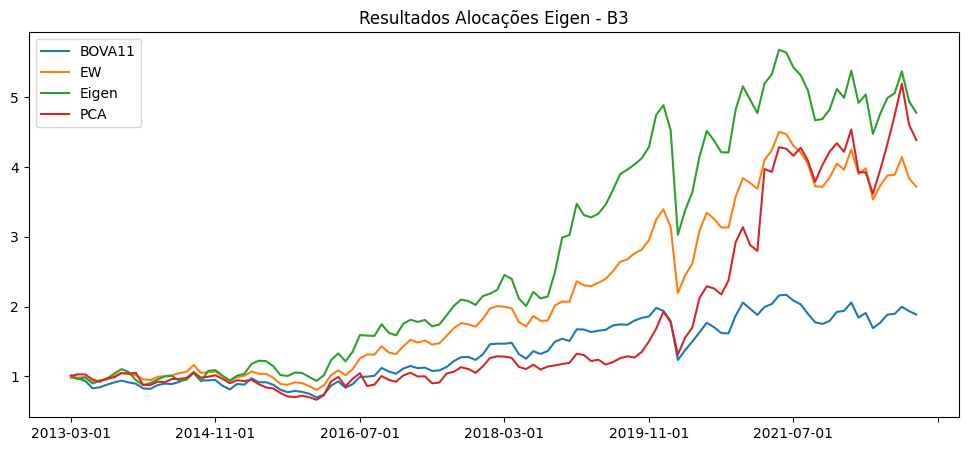

In [ ]:
periodos = 36
oos = 1

bova = f.returns(pd.read_csv('precos.csv', sep=';', index_col='Date')['BOVA11.SA']);print('Benchmark Done')
rets_ew = f.pipeline(stock_prices, periodos, oos, algo=f.weight_ew);print('EW Done')
rets_hrp = f.pipeline(stock_prices, periodos, oos, algo=weight_hrp);print('HRP Done')

eigen_portfolios_results = pd.DataFrame(
    {
        "BOVA11": bova[rets_ew.index.min():],
        "EW": rets_ew['rets'],
        "HRP": rets_hrp['rets'],
    }
)

(1+eigen_portfolios_results).cumprod().plot(figsize=(12,5), title="Resultados Alocações Eigen - B3");
f.summary_stats(eigen_portfolios_results, 0)

In [ ]:
eigen_portfolios_results.corr()

,BOVA11,EW,Eigen,PCA
BOVA11,1.000000,0.946624,0.883377,0.769282
EW,0.946624,1.000000,0.910981,0.811280
Eigen,0.883377,0.910981,1.000000,0.728768
PCA,0.769282,0.811280,0.728768,1.000000
